### Importação de bibliotecas

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport

### Tratamento das bases de dados

In [188]:
municipios = pd.read_excel("Dados/Municipios/lista-1262municipios-semiarido-2017.xlsx")
municipios = municipios.rename(columns=municipios.iloc[1])
municipios = municipios.drop([0, 1]).reset_index(drop=True)
municipios = municipios.drop('#', axis=1).reset_index(drop=True)

In [189]:
municipios_todos = pd.read_csv("Dados/Municipios/municipios.csv")
municipios_todos = municipios_todos[(municipios_todos['codigo_ibge'].isin(municipios['Cod IBGE']))]

In [190]:
idh_tot = pd.read_csv("Dados/Registros_Administrativos/dados_registros_administrativos_total_2012_2027.csv")
idh_leg = pd.read_csv("Dados/Registros_Administrativos/dados_registros_administrativos_LEGENDA.csv")

In [191]:
censo = pd.read_csv("Dados/Censo/Censo_municipal_estadual_nacional-MUN91-00-10.csv")
censo = censo[(censo['Codmun7'].isin(municipios['Cod IBGE']))]
censo_siglas = pd.read_csv("Dados/Censo/Censo_municipal_estadual_nacional-Siglas.csv")

In [192]:
alagoas = pd.read_csv("Dados/Dados IBGE/Alagoas.csv")
bahia = pd.read_csv("Dados/Dados IBGE/Bahia.csv")
ceara = pd.read_csv("Dados/Dados IBGE/Ceara.csv")
maranhao = pd.read_csv("Dados/Dados IBGE/Maranhao.csv")
minas_gerais = pd.read_csv("Dados/Dados IBGE/Minas Gerais.csv")
paraiba = pd.read_csv("Dados/Dados IBGE/Paraiba.csv")
pernambuco = pd.read_csv("Dados/Dados IBGE/Pernambuco.csv")
piaui = pd.read_csv("Dados/Dados IBGE/Piaui.csv")
rio_grande_do_norte = pd.read_csv("Dados/Dados IBGE/Rio Grande do Norte.csv")
sergipe = pd.read_csv("Dados/Dados IBGE/Sergipe.csv")

dados_ibge = pd.concat([alagoas, bahia, ceara, maranhao, minas_gerais, paraiba, pernambuco, piaui, rio_grande_do_norte, sergipe], ignore_index=True)
dados_ibge = dados_ibge[(dados_ibge['Munic&iacute;pio [-]'].isin(municipios['Cod IBGE']))]

In [193]:
idh_tot_to_merge = idh_tot.drop_duplicates(subset='IBGE7', keep='last').reset_index(drop=True)
censo_to_merge = censo.drop_duplicates(subset='Codmun7', keep='last').reset_index(drop=True)
censo_idh_merged = pd.merge(idh_tot_to_merge[['IBGE7', 'NOME', 'POP_TOT']], censo_to_merge[['Codmun7', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']], left_on='IBGE7', right_on='Codmun7', how='inner')
df = censo_idh_merged.drop('Codmun7', axis=1)
df = pd.merge(df, municipios[['Cod IBGE', 'UF']], left_on='IBGE7', right_on='Cod IBGE', how='inner')
df = pd.merge(df, municipios_todos[['codigo_ibge', 'latitude', 'longitude']], left_on='IBGE7', right_on='codigo_ibge', how='inner')
df = df.sort_values(by='IBGE7')

In [194]:
dados_ibge = dados_ibge.sort_values(by='Munic&iacute;pio [-]').reset_index(drop=True)
df['AREA_KM²'] = dados_ibge['Prefeito [2021]']
df['POP/KM²'] = dados_ibge['Popula&ccedil;&atilde;o residente - pessoas [2022]']

In [195]:
censo_siglas[(censo_siglas['SIGLA'].isin(['PIA18M']))]

,SIGLA,NOME CURTO,NOME LONGO,DEFINIÇÃO
228,PIA18M,População de 18 anos ou mais,População de 18 anos ou mais em idade ativa,População residente nessa faixa etária


In [196]:
df[(df['IBGE7'].isin([2602803, 2607000, 2308104, 2708402]))].sort_values(by=['IDHM'])

,IBGE7,NOME,POP_TOT,IDHM,IDHM_E,IDHM_L,IDHM_R,Cod IBGE,UF,codigo_ibge,latitude,longitude,AREA_KM²,POP/KM²
753,2607000,Inajá,22801,0.523,0.400,0.711,0.503,2607000,PE,2607000,-8.90206,-37.8351,1231.362,20.79
722,2602803,Buíque,57696,0.527,0.395,0.746,0.497,2602803,PE,2602803,-8.61954,-37.1606,1336.544,38.98
861,2708402,São José da Tapera,32626,0.527,0.409,0.703,0.508,2708402,AL,2708402,-9.55768,-37.3831,490.879,62.35
290,2308104,Mauriti,46548,0.605,0.526,0.772,0.544,2308104,CE,2308104,-7.38597,-38.7708,1079.011,42.22


In [214]:
df[df['IDHM'] <= 0.52].sort_values(by='IDHM')

,IBGE7,NOME,POP_TOT,IDHM,IDHM_E,IDHM_L,IDHM_R,Cod IBGE,UF,codigo_ibge,latitude,longitude,AREA_KM²,POP/KM²
840,2703304,Inhapi,18652,0.484,0.316,0.718,0.501,2703304,AL,2703304,-9.22594,-37.7509,372.019,40.77
151,2209658,São Francisco de Assis do Piauí,5657,0.485,0.336,0.734,0.462,2209658,PI,2209658,-8.23599,-41.6873,1072.311,5.20
1016,2916500,Itapicuru,36211,0.486,0.319,0.711,0.505,2916500,BA,2916500,-11.30880,-38.2262,1557.685,20.34
769,2609154,Manari,21047,0.487,0.354,0.682,0.477,2609154,PE,2609154,-8.96490,-37.6313,344.685,68.94
49,2202653,Caxingó,5330,0.488,0.329,0.708,0.498,2202653,PI,2202653,-3.41904,-41.8955,491.093,11.19
23,2201739,Betânia do Piauí,6106,0.489,0.342,0.702,0.486,2201739,PI,2201739,-8.14376,-40.7989,579.576,10.73
851,2706000,Olivença,11772,0.493,0.345,0.677,0.513,2706000,AL,2706000,-9.51954,-37.1954,175.288,61.68
50,2202703,Cocal,27338,0.497,0.334,0.712,0.516,2202703,PI,2202703,-3.47279,-41.5546,1294.133,21.80
52,2202729,Cocal dos Alves,6054,0.498,0.315,0.779,0.504,2202729,PI,2202729,-3.62047,-41.4402,324.856,19.66
14,2201051,Assunção do Piauí,7717,0.499,0.382,0.706,0.462,2201051,PI,2201051,-5.86500,-41.0389,1690.703,4.41


In [198]:
df[(df['POP_TOT'] >= 15000) & (df['IDHM'] < 0.5)].sort_values(by='IDHM')

,IBGE7,NOME,POP_TOT,IDHM,IDHM_E,IDHM_L,IDHM_R,Cod IBGE,UF,codigo_ibge,latitude,longitude,AREA_KM²,POP/KM²
840,2703304,Inhapi,18652,0.484,0.316,0.718,0.501,2703304,AL,2703304,-9.22594,-37.7509,372.019,40.77
1016,2916500,Itapicuru,36211,0.486,0.319,0.711,0.505,2916500,BA,2916500,-11.30880,-38.2262,1557.685,20.34
769,2609154,Manari,21047,0.487,0.354,0.682,0.477,2609154,PE,2609154,-8.96490,-37.6313,344.685,68.94
50,2202703,Cocal,27338,0.497,0.334,0.712,0.516,2202703,PI,2202703,-3.47279,-41.5546,1294.133,21.80


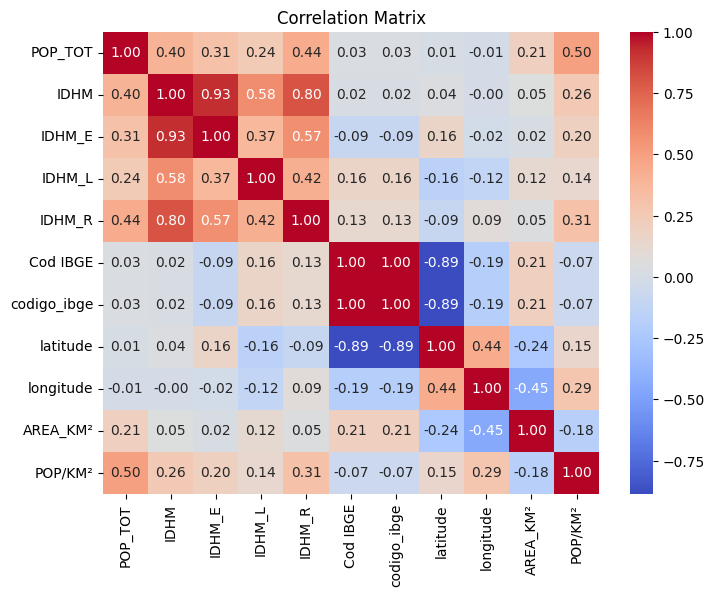

In [199]:
correlation_df = df.copy()
correlation_df = correlation_df.drop('IBGE7', axis=1)
correlation_df = correlation_df.drop('NOME', axis=1)
correlation_df = correlation_df.drop('UF', axis=1)
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Text(0, 0.5, 'ESCOLARIZAÇÃO')

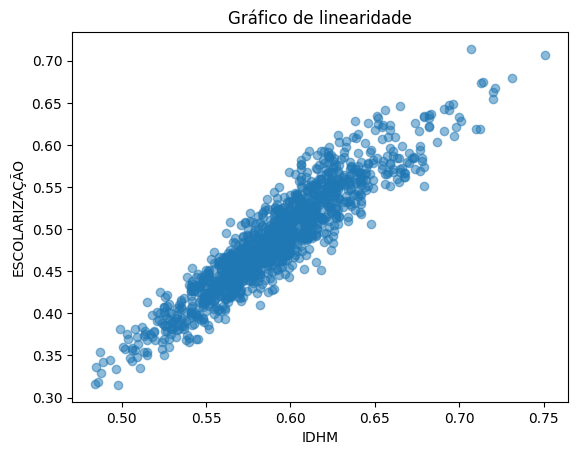

In [200]:
x = df['IDHM']
y = df['IDHM_E']

df[(df['POP_TOT'] >= 15000) & (df['IDHM'] < 0.52)]['IDHM']

plt.scatter(x, y, alpha=0.5)
plt.title('Gráfico de linearidade')
plt.xlabel('IDHM')
plt.ylabel('ESCOLARIZAÇÃO')

In [201]:
final_towns = df[(df['POP_TOT'] >= 15000) & (df['IDHM'] < 0.52)].copy().reset_index(drop=True)

In [202]:
transporte = pd.read_csv("Dados/Transportes/transport_cost.csv")
transporte = transporte[(transporte['codigo_ibge'].isin(final_towns['IBGE7']))]
min_cost_indices = transporte.groupby('codigo_ibge')['transportation_cost'].idxmin()
transporte = transporte.loc[min_cost_indices].sort_values(by=['codigo_ibge'])
final_towns['CUSTO_TRANSPORTE'] = transporte['transportation_cost'].reset_index(drop=True)

In [203]:
final_towns.sort_values(by='CUSTO_TRANSPORTE')

,IBGE7,NOME,POP_TOT,IDHM,IDHM_E,IDHM_L,IDHM_R,Cod IBGE,UF,codigo_ibge,latitude,longitude,AREA_KM²,POP/KM²,CUSTO_TRANSPORTE
8,2916500,Itapicuru,36211,0.486,0.319,0.711,0.505,2916500,BA,2916500,-11.30880,-38.2262,1557.685,20.34,23766.05503
12,2926509,Ribeira do Amparo,15443,0.512,0.384,0.694,0.503,2926509,BA,2926509,-11.04210,-38.4242,644.229,21.48,23986.17667
10,2924207,Pedro Alexandre,18209,0.513,0.354,0.778,0.489,2924207,BA,2924207,-10.01200,-37.8932,889.572,15.69,24348.88519
2,2608404,Jurema,15284,0.509,0.372,0.681,0.522,2608404,PE,2608404,-8.70714,-36.1347,148.254,92.06,24446.52253
9,2921500,Monte Santo,51953,0.506,0.359,0.699,0.515,2921500,BA,2921500,-10.43740,-39.3321,3034.197,15.75,24661.74527
6,2703304,Inhapi,18652,0.484,0.316,0.718,0.501,2703304,AL,2703304,-9.22594,-37.7509,372.019,40.77,24731.10036
5,2701605,Canapi,17983,0.506,0.357,0.719,0.504,2701605,AL,2701605,-9.11932,-37.5967,602.778,25.81,24734.22180
1,2607505,Itaíba,26314,0.510,0.364,0.688,0.531,2607505,PE,2607505,-8.94569,-37.4173,1061.694,30.75,24766.12422
7,2705002,Mata Grande,25589,0.504,0.369,0.685,0.506,2705002,AL,2705002,-9.11824,-37.7323,914.722,23.88,24784.14603
3,2609154,Manari,21047,0.487,0.354,0.682,0.477,2609154,PE,2609154,-8.96490,-37.6313,344.685,68.94,24832.77179


### Análise exploratória dos dados de exportação

In [204]:
exportacao = pd.read_csv("Dados/COMEX/EXP_2022_MUN.csv", sep = ';')
exportacao

,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,CO_MUN,KG_LIQUIDO,VL_FOB
0,2022,4,9403,845,PR,4101002,53482,47615
1,2022,10,8501,386,SC,4208906,220899,1348091
2,2022,9,1902,580,ES,3205309,564,2264
3,2022,1,6206,63,SC,4216602,85,6642
4,2022,2,8501,249,SC,4208906,2942192,12155328
...,...,...,...,...,...,...,...,...
1087126,2022,9,2201,445,SP,3448500,1260,328
1087127,2022,7,9603,586,RS,4304804,24,350
1087128,2022,9,8527,239,PR,4120804,234,34731
1087129,2022,1,203,767,PA,1506807,30,226


In [205]:
exp_sem = exportacao[(exportacao['CO_MUN'] == final_towns['IBGE7'])]

ValueError: Can only compare identically-labeled Series objects

In [ ]:
exp_leg = pd.read_csv("Dados/COMEX/sh4_agropecuaria.csv", sep = ',')
exp_leg

,Código SH4,Descrição do produto exportado,Denominação nesse estudo
0,5201,"Algodão, não cardado nem penteado.",Algodão
1,5203,Algodão cardado ou penteado.,Algodão
2,1404,Produtos vegetais não especificados nem compre...,Coprodutos do Algodão
3,5204,"Linhas para costurar, de algodão, mesmo acondi...",Coprodutos do Algodão
4,5205,"Fios de algodão (exceto linhas para costurar),...",Coprodutos do Algodão
...,...,...,...
63,1108,Amidos e féculas.,Farelo/Farinha e Resíduos Sólidos
64,1005,Milho,Milho/Soja em Grãos
65,1102,"Farinhas de cereais, exceto de trigo ou de mis...",Farelo/Farinha e Resíduos Sólidos
66,1103,"Grumos, sêmolas e pellets de cereais.",Farelo/Farinha e Resíduos Sólidos
